# BOOKWORM

In [124]:
import numpy as np
import cv2
from PIL import Image

In [125]:
dot_kernel = np.ones((1,1),np.uint8)

circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

bigger_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
bigger_circle_kernel[0][1]=1
bigger_circle_kernel[0][3]=1
bigger_circle_kernel[4][1]=1
bigger_circle_kernel[4][3]=1


square_kernel = np.ones((3,3),np.uint8)

bigger_square_kernel = np.ones((5,5),np.uint8)

biggest_square_kernel= np.ones((7,7),np.uint8)

huge_kernel = np.ones((19,19), np.uint8)
huge_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19))

biggest_circle_kernel= np.ones((7,7),np.uint8)
biggest_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
biggest_circle_kernel[0][2]=1
biggest_circle_kernel[0][4]=1
biggest_circle_kernel[1][0]=1
biggest_circle_kernel[1][6]=1
biggest_circle_kernel[5][0]=1
biggest_circle_kernel[5][6]=1
biggest_circle_kernel[6][2]=1
biggest_circle_kernel[6][4]=1
#print(biggest_circle_kernel)

In [126]:
english03 = cv2.imread('english02.jpg',1)

# Rescaling

In [127]:
rescaled = cv2.resize(english03, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

In [128]:
grey = cv2.cvtColor(rescaled, cv2.COLOR_BGR2GRAY)

In [129]:
dilated = cv2.dilate(grey, circle_kernel, iterations=2)

In [130]:
erosion = cv2.erode(dilated, circle_kernel, iterations=4)

In [131]:
smoothed = cv2.GaussianBlur(erosion, (15,15), 0)

In [132]:
thresholded = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

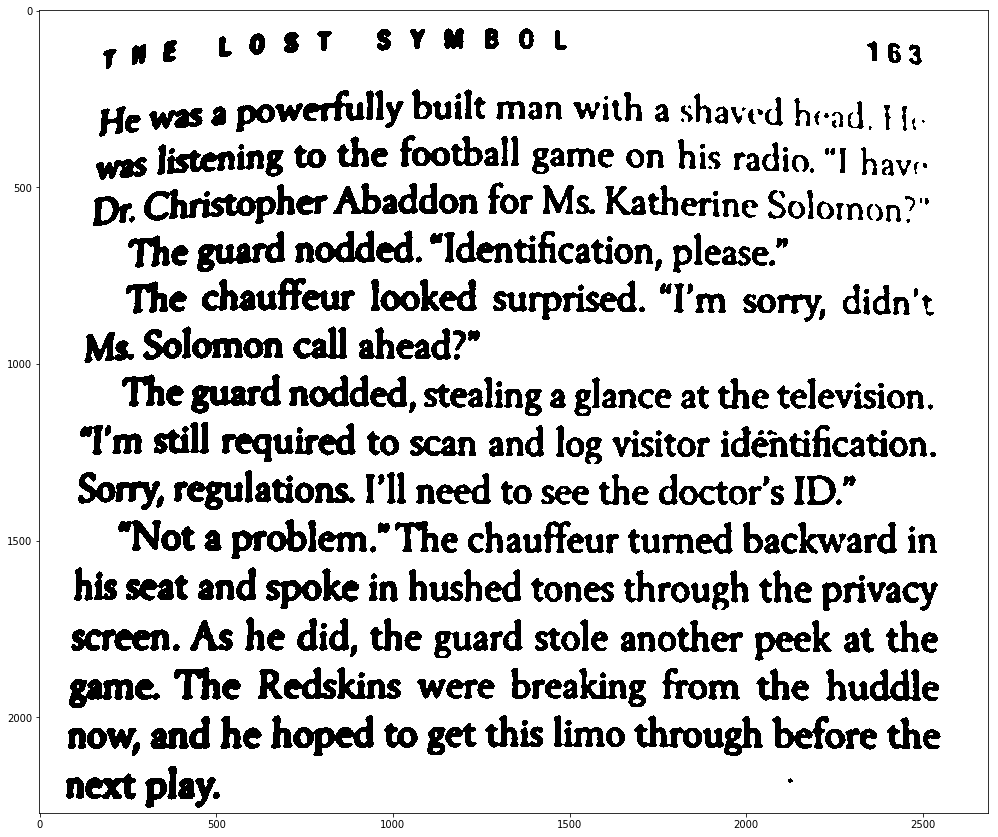

In [134]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
matplotlib.use('Agg')
%matplotlib inline
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [17, 17]

cv2.imwrite('thresholded.png',thresholded)
im = Image.open("thresholded.png")
im.save("thresholded.png", dpi=(300,300))

english03_fig = plt.figure()
ax1 = english03_fig.add_subplot(1,1,1)
ax1.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))